In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder

In [108]:
#zaczytaj dane z pliku csv
trainDataFrame = pd.read_csv('countries of the world (2).csv', sep=",")
trainDataFrame2 = trainDataFrame.copy()
#sprawdź liczbę kolumn i wierszy
trainDataFrame.shape
trainDataFrame.info()
#wyświetl część tabeli
trainDataFrame.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [109]:

# stwórz obiekt enkodera
le = LabelEncoder()
for column in trainDataFrame.columns:
    if pd.api.types.is_object_dtype(trainDataFrame[column]):
        trainDataFrame[column] = le.fit_transform(trainDataFrame[column])


#replace NaN values with 0
trainDataFrame.fillna(0, inplace=True)

#scaleer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainDataFrame_scaled = scaler.fit_transform(trainDataFrame)




In [110]:
#give trainDataFrame_scaled country names from trainDataFrame
trainDataFrame_scaled = pd.DataFrame(trainDataFrame_scaled)
trainDataFrame_scaled.columns = trainDataFrame.columns




In [111]:
trainDataFrame_scaled.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,-1.724437,-1.707114,0.019695,0.027583,0.594347,-1.106205,1.365247,-1.164306,-0.892453,-1.834491,-0.307893,-0.973387,-0.932190,0.258271,-1.555932,1.275270,-0.804644,1.288404,-0.501081,-1.315639
1,-1.709177,-0.813536,-0.213877,-0.318797,-1.375125,-0.023571,-0.102465,-0.778200,-0.513413,-0.114354,1.276554,0.039576,1.311401,-0.642947,0.826507,-0.940743,-0.099156,0.716888,-0.971634,-0.045921
2,-1.693916,0.080041,0.035618,0.998421,-1.264835,-1.043746,-1.570177,-0.268540,-0.363792,-0.829216,1.372581,0.504543,-0.874662,1.127302,-1.555932,-0.613023,-0.334319,-0.235637,1.552240,-1.622829
3,-1.678656,0.675760,-0.243834,-0.334779,-0.130419,1.558740,-0.475612,1.461217,-0.164297,0.689865,-0.579970,-1.222477,0.429306,-0.594668,-0.364713,-0.051217,-0.619873,1.690581,1.680572,1.571946
4,-1.663395,1.271478,-0.243720,-0.334629,-0.981231,-1.106205,1.763271,-0.144986,0.932923,-1.946188,0.652378,-0.292543,-1.219829,1.352607,0.826507,1.384510,0.337575,1.690581,1.680572,1.571946


In [112]:
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(trainDataFrame_scaled)


In [113]:
#add column with country names from trainDataFrame2 to kmeans.labels_
trainDataFrame2["cluster"] = kmeans.labels_
trainDataFrame2["cluster"].value_counts()


cluster
0    41
2    28
9    28
3    27
4    25
8    25
1    23
5    15
7    13
6     2
Name: count, dtype: int64

In [114]:
pd.set_option('display.max_rows', None)

#display all clusters with containing countries 
for i in range(10):
    print("Cluster ", i)
    print(trainDataFrame2[trainDataFrame2["cluster"] == i]["Country"])
    print("\n\n\n")

Cluster  0
0               Afghanistan 
5                    Angola 
21                    Benin 
31             Burkina Faso 
33                  Burundi 
35                 Cameroon 
39     Central African Rep. 
40                     Chad 
44                  Comoros 
45         Congo, Dem. Rep. 
49            Cote d'Ivoire 
63                  Eritrea 
65                 Ethiopia 
73              Gambia, The 
77                    Ghana 
86                   Guinea 
87            Guinea-Bissau 
89                    Haiti 
107                   Kenya 
113                    Laos 
117                 Liberia 
124              Madagascar 
125                  Malawi 
128                    Mali 
132              Mauritania 
142              Mozambique 
145                   Nepal 
151                   Niger 
152                 Nigeria 
156                Pakistan 
160                Paraguay 
170                  Rwanda 
180                 Senegal 
183            Sierra Leone 
188

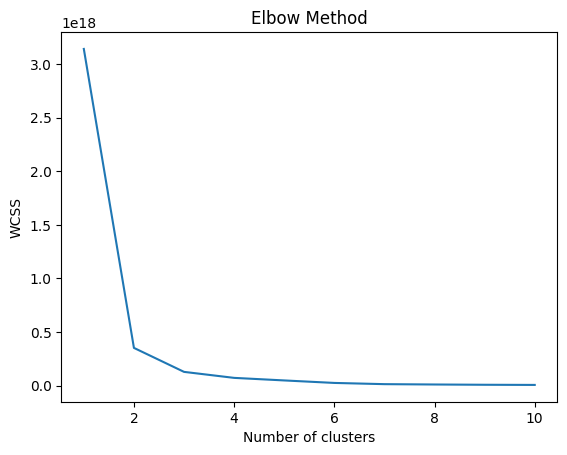

In [115]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(trainDataFrame)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

AttributeError: 'KMeans' object has no attribute 'children_'

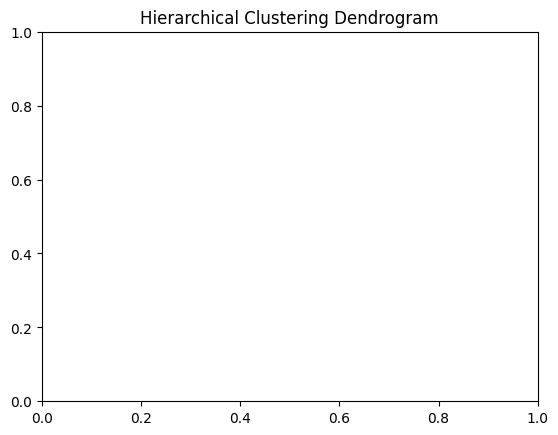

In [117]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(trainDataFrame)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=7)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

[171 189 190 147 123 175 124 225 151 221 149 117 115 129 176 130 125 159
 187  61 150 218 212 191 141 126 215 167 166 119 204 226 203 210 200 197
 173 223  62 222 182 142 216 208 134 164 101 133 148 120 213 168 169 224
 195 153 188 183 118 214 160 172 170 114 136 157  87 113 179 161 184 181
 192 206 186 137 155  79 152  94  56 207 220 116  85 139 162 138 174 143
 165 135  66 146 144 154 199  74 121  86 201 202 219 185  76  90  71 205
  42 193 103 198 209 217 107 145 108 158 131 127 180  75  30  92  58  70
  84  72 177 211 196  93 132 105  82  97  98 102  89  83 109  41 106 128
 163  73 194  59  81 100  95  57  91  46 112 178  67  78  96  28  88  47
 111  63  55 122  45  48  68  37  50  44 156  65 110  77 104  36  43  52
 140  22  80  39  38  21  54  64  18  40  31  35  20  33  23  10  27  69
  99  19  60  49  17  29  24  11  32  34   9  53  13  26   8  15  16  14
   6   7   3  51  25   4  12   5   1   2   0]
227
[ 1.44375313  1.88291055  1.96295472  2.06835544  2.08905865  2.10308783
 